<a href="https://colab.research.google.com/github/shahdmohamedfouad/shahdmohamedfouad/blob/main/Grad_Cam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()  # ارفعي "Inception V3.zip"

Saving Inception V3 (2).zip to Inception V3 (2).zip
Saving mobilenet v2.zip to mobilenet v2.zip


In [4]:
!unzip "/content/Inception V3 (2).zip" -d /content/ai_models

Archive:  /content/Inception V3 (2).zip
   creating: /content/ai_models/AI Model/
  inflating: /content/ai_models/AI Model/asl_inception_final.h5  
  inflating: /content/ai_models/AI Model/best_asl_inception.h5  
  inflating: /content/ai_models/AI Model/class_indices.json  
  inflating: /content/ai_models/AI Model/inception-v3-fatema-tarek.ipynb  


In [5]:
import os
print(os.listdir("/content/ai_models"))

['AI Model']


In [5]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json

In [6]:
from google.colab import files
uploaded = files.upload()  # ارفعي zip file بتاع MobileNetV2

Saving mobilenet v2.zip to mobilenet v2.zip


In [7]:
!unzip "/content/mobilenet v2.zip" -d /content/mobilenetv2

Archive:  /content/mobilenet v2.zip
  inflating: /content/mobilenetv2/mobilenet v2/asl_model_final.h5  
  inflating: /content/mobilenetv2/mobilenet v2/asl_model_final.keras  
  inflating: /content/mobilenetv2/mobilenet v2/backup_final.h5  
  inflating: /content/mobilenetv2/mobilenet v2/backup_phase1.h5  
  inflating: /content/mobilenetv2/mobilenet v2/best_model_final.h5  
  inflating: /content/mobilenetv2/mobilenet v2/best_model_phase1.h5  
  inflating: /content/mobilenetv2/mobilenet v2/confusion_matrix.png  
  inflating: /content/mobilenetv2/mobilenet v2/phase1_complete.h5  
  inflating: /content/mobilenetv2/mobilenet v2/phase1_complete.keras  
  inflating: /content/mobilenetv2/mobilenet v2/sample_predictions.png  
  inflating: /content/mobilenetv2/mobilenet v2/training_history.png  


In [8]:
import os
print(os.listdir("/content"))

['.config', 'Inception V3 (2).zip', 'mobilenet v2.zip', 'mobilenetv2', 'ai_models', 'sample_data']


In [4]:
# تحميل الموديل (best هو الأفضل)
model = tf.keras.models.load_model("/content/ai_models/AI Model/asl_inception_final.h5")

# تحميل class_indices.json (لو عايزة تستخدميه في الـ GUI)
#import json
#with open("/content/ai_models/class_indices.json", "r") as f:
   # class_indices = json.load(f)
#print("Class indices loaded:", class_indices)

NameError: name 'tf' is not defined

GRADIENT ATTENTION MAP VISUALIZATION
📚 Loaded 27 ASL classes

📥 Loading models...
✅ Models loaded successfully!

CREATING ATTENTION MAPS

📊 Processing InceptionV3...

🔍 Processing InceptionV3...
  ✅ Predicted: W (100.00%)
  ✅ Attention map created (range: 0.000-1.000)

📊 Processing MobileNetV2...

🔍 Processing MobileNetV2...
  ✅ Predicted: W (93.59%)
  ✅ Attention map created (range: 0.002-1.000)

VISUALIZATION


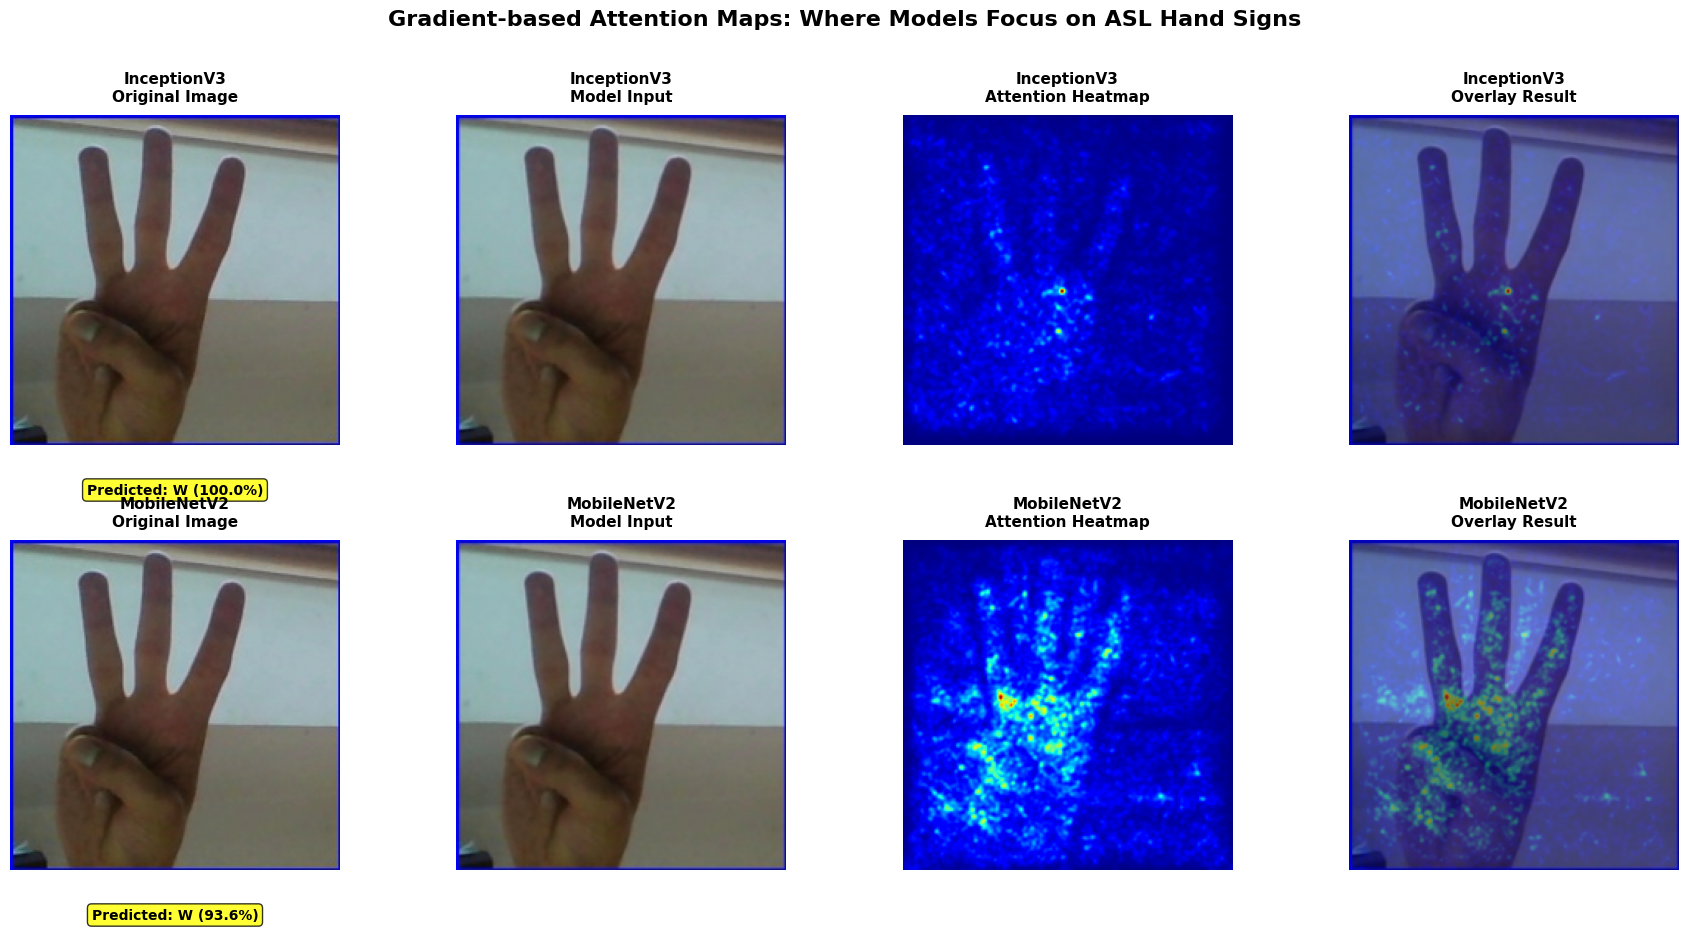


SIDE-BY-SIDE COMPARISON


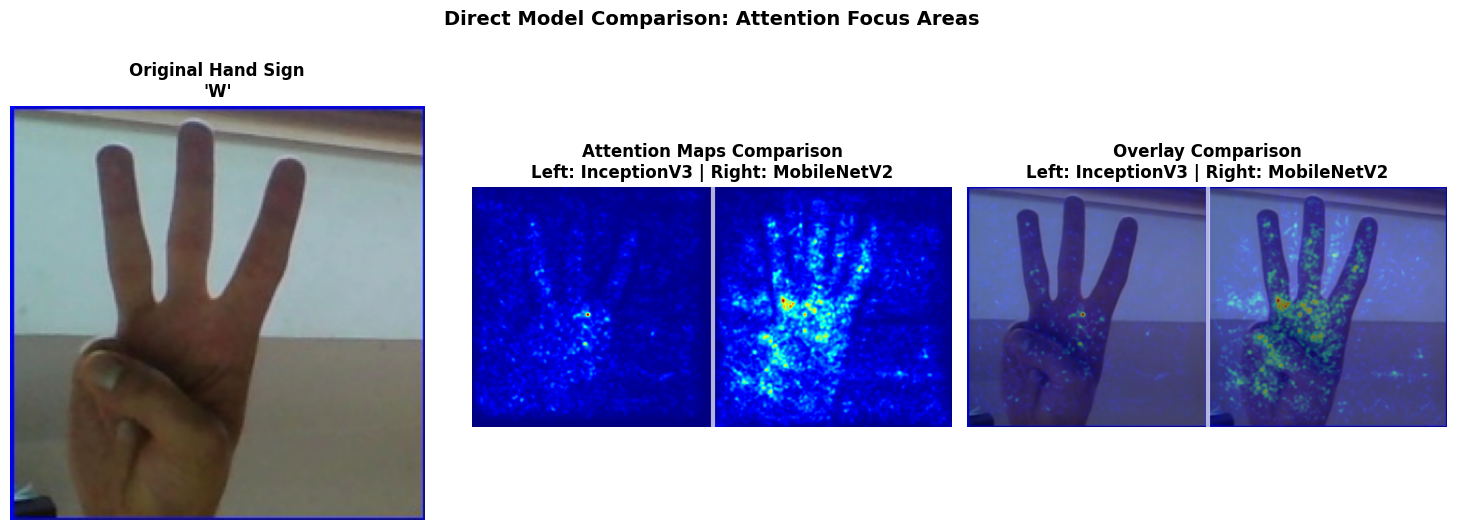


DETAILED ANALYSIS

📈 InceptionV3 Analysis:
  • Predicted letter: W
  • Confidence: 100.00%
  • Attention intensity: 1.000
  • Attention distribution:
    - High (>0.7): 0.0%
    - Medium (0.3-0.7): 0.1%
    - Low (<0.3): 99.9%
  • Top 5 predictions:
    1. W: 100.00%

📈 MobileNetV2 Analysis:
  • Predicted letter: W
  • Confidence: 93.59%
  • Attention intensity: 1.000
  • Attention distribution:
    - High (>0.7): 0.0%
    - Medium (0.3-0.7): 4.5%
    - Low (<0.3): 95.5%
  • Top 5 predictions:
    1. W:  93.59%
    2. F:   0.34%
    3. T:   0.28%
    4. B:   0.27%
    5. V:   0.27%

BACKUP: SIMPLE VISUALIZATION

Running simple backup visualization...


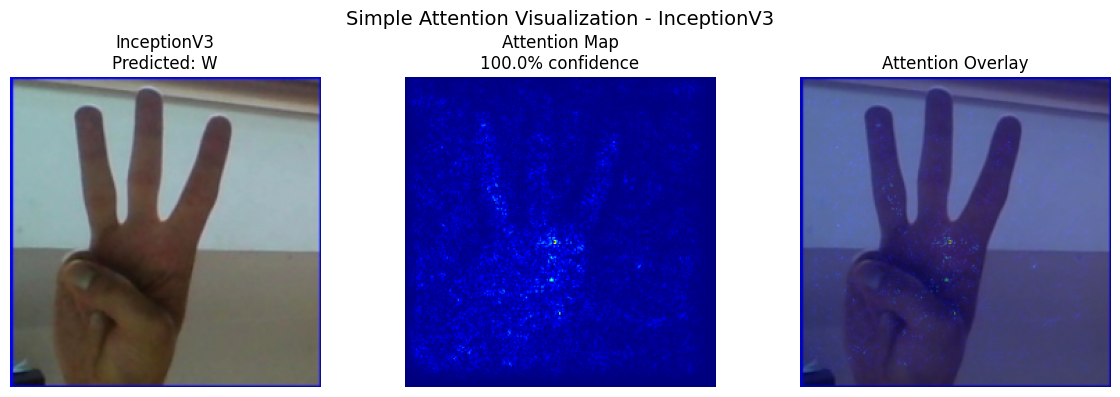

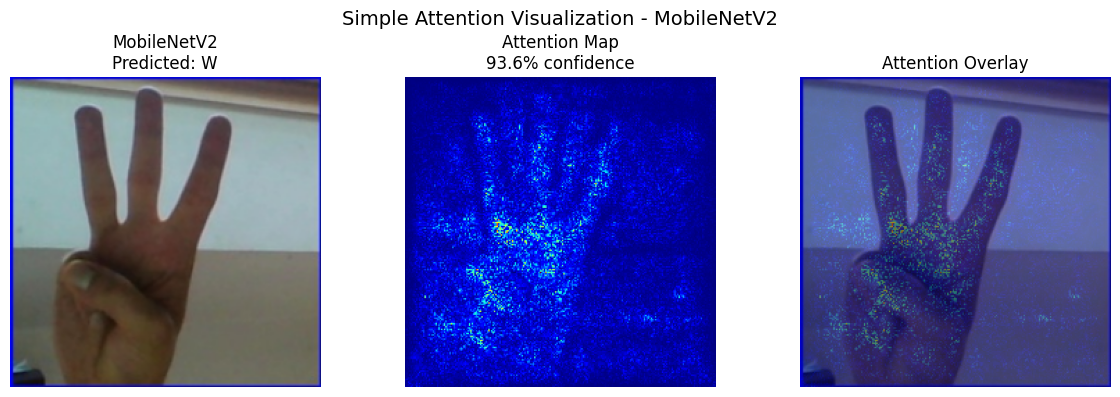


🎉 ANALYSIS COMPLETE!

✅ Successfully created gradient-based attention maps.
🔴 Red areas = High model attention (most important)
🟡 Yellow areas = Medium attention
🔵 Blue areas = Low attention

📊 Key findings:
1. InceptionV3 predicted: W (100.0%)
2. MobileNetV2 predicted: W (93.6%)
3. Each model focuses on different features of the hand sign


In [14]:
# FINAL WORKING SOLUTION - GRADIENT-BASED ATTENTION MAP

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json

print("="*60)
print("GRADIENT ATTENTION MAP VISUALIZATION")
print("="*60)

# ========== STEP 1: LOAD DATA ==========
# Load class indices
with open("/content/ai_models/AI Model/class_indices.json", "r") as f:
    class_indices = json.load(f)
classes = {v: k for k, v in class_indices.items()}

print(f"📚 Loaded {len(classes)} ASL classes")

# ========== STEP 2: LOAD MODELS ==========
print("\n📥 Loading models...")
inception_model = tf.keras.models.load_model(
    "/content/ai_models/AI Model/asl_inception_final.h5",
    compile=False
)

mobilenet_model = tf.keras.models.load_model(
    "/content/mobilenetv2/mobilenet v2/asl_model_final.h5",
    compile=False
)
print("✅ Models loaded successfully!")

# ========== STEP 3: SIMPLE GRADIENT ATTENTION FUNCTION ==========
def create_gradient_attention_map(model, img_path, model_name="Model"):
    """
    Create attention map using input gradients (simpler than Grad-CAM)
    """
    print(f"\n🔍 Processing {model_name}...")

    # Load and preprocess image
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Could not load image from {img_path}")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))

    # Normalize based on model
    if 'inception' in model_name.lower():
        # InceptionV3 expects [-1, 1]
        x_np = img_resized.astype('float32') / 127.5 - 1.0
    else:
        # MobileNetV2 expects [-1, 1]
        x_np = img_resized.astype('float32') / 127.5 - 1.0

    # Create tensor
    x_tensor = tf.convert_to_tensor(x_np[np.newaxis, ...], dtype=tf.float32)

    # Make prediction
    preds_np = model.predict(x_np[np.newaxis, ...], verbose=0)[0]
    pred_class = np.argmax(preds_np)
    confidence = preds_np[pred_class] * 100
    predicted_letter = classes[pred_class]

    print(f"  ✅ Predicted: {predicted_letter} ({confidence:.2f}%)")

    # Compute gradients
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        predictions = model(x_tensor, training=False)
        loss = predictions[:, pred_class]

    # Get gradients with respect to input
    grads = tape.gradient(loss, x_tensor)

    if grads is None:
        print("  ⚠️  Gradients are None, using alternative method...")
        # Alternative: Use guided backpropagation
        with tf.GradientTape() as tape2:
            tape2.watch(x_tensor)
            predictions = model(x_tensor, training=False)
            pred_class_tensor = tf.argmax(predictions[0])
            loss = predictions[:, pred_class_tensor]

        grads = tape2.gradient(loss, x_tensor)

    # Process gradients
    grads_np = grads[0].numpy()  # Remove batch dimension

    # Create attention map from gradients
    # Method 1: Absolute sum of gradients across channels
    grads_abs = np.abs(grads_np)
    attention_map = np.sum(grads_abs, axis=2)

    # Method 2: Use positive gradients only (guided)
    grads_pos = np.maximum(grads_np, 0)
    attention_map2 = np.sum(grads_pos, axis=2)

    # Combine both methods
    attention_map = (attention_map + attention_map2) / 2

    # Normalize
    attention_map = np.maximum(attention_map, 0)
    if np.max(attention_map) > 0:
        attention_map = attention_map / np.max(attention_map)

    # Resize and smooth
    attention_map = cv2.resize(attention_map, (224, 224))
    attention_map = cv2.GaussianBlur(attention_map, (5, 5), 0)

    # Renormalize after smoothing
    if np.max(attention_map) > 0:
        attention_map = attention_map / np.max(attention_map)

    print(f"  ✅ Attention map created (range: {attention_map.min():.3f}-{attention_map.max():.3f})")

    # Create visualization
    heatmap_uint8 = np.uint8(255 * attention_map)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    # Superimpose
    superimposed = cv2.addWeighted(img_resized, 0.6, heatmap_color, 0.4, 0)

    return {
        'original': img_rgb,
        'processed': img_resized,
        'attention_map': attention_map,
        'heatmap_color': heatmap_color,
        'superimposed': superimposed,
        'prediction': predicted_letter,
        'confidence': confidence,
        'all_predictions': preds_np
    }

# ========== STEP 4: PROCESS BOTH MODELS ==========
print("\n" + "="*60)
print("CREATING ATTENTION MAPS")
print("="*60)

# Process InceptionV3
print("\n📊 Processing InceptionV3...")
inception_result = create_gradient_attention_map(
    inception_model,
    "/content/W_test.jpg",
    "InceptionV3"
)

# Process MobileNetV2
print("\n📊 Processing MobileNetV2...")
mobilenet_result = create_gradient_attention_map(
    mobilenet_model,
    "/content/W_test.jpg",
    "MobileNetV2"
)

# ========== STEP 5: VISUALIZE RESULTS ==========
print("\n" + "="*60)
print("VISUALIZATION")
print("="*60)

# Create main visualization
fig, axes = plt.subplots(2, 4, figsize=(18, 9))

# Column titles
col_titles = ['Original Image', 'Model Input', 'Attention Heatmap', 'Overlay Result']

for col, title in enumerate(col_titles):
    axes[0, col].set_title(f"InceptionV3\n{title}", fontsize=11, fontweight='bold', pad=10)
    axes[1, col].set_title(f"MobileNetV2\n{title}", fontsize=11, fontweight='bold', pad=10)

# Plot InceptionV3 results
axes[0, 0].imshow(inception_result['original'])
axes[0, 1].imshow(inception_result['processed'])
axes[0, 2].imshow(inception_result['attention_map'], cmap='jet')
axes[0, 3].imshow(inception_result['superimposed'])

# Plot MobileNetV2 results
axes[1, 0].imshow(mobilenet_result['original'])
axes[1, 1].imshow(mobilenet_result['processed'])
axes[1, 2].imshow(mobilenet_result['attention_map'], cmap='jet')
axes[1, 3].imshow(mobilenet_result['superimposed'])

# Add prediction info
for idx, (model_name, result) in enumerate([('InceptionV3', inception_result),
                                           ('MobileNetV2', mobilenet_result)]):
    axes[idx, 0].text(0.5, -0.15, f"Predicted: {result['prediction']} ({result['confidence']:.1f}%)",
                     transform=axes[idx, 0].transAxes,
                     ha='center', fontsize=10, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

# Turn off axis
for ax in axes.flat:
    ax.axis('off')

plt.suptitle("Gradient-based Attention Maps: Where Models Focus on ASL Hand Signs",
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ========== STEP 6: COMPARISON VISUALIZATION ==========
print("\n" + "="*60)
print("SIDE-BY-SIDE COMPARISON")
print("="*60)

fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

# Original
axes2[0].imshow(inception_result['original'])
axes2[0].set_title("Original Hand Sign\n'W'", fontweight='bold')
axes2[0].axis('off')

# Attention maps comparison
comparison_img = np.zeros((224, 448, 3), dtype=np.uint8)
comparison_img[:, :224] = inception_result['heatmap_color']
comparison_img[:, 224:] = mobilenet_result['heatmap_color']

axes2[1].imshow(comparison_img)
axes2[1].set_title("Attention Maps Comparison\nLeft: InceptionV3 | Right: MobileNetV2", fontweight='bold')
axes2[1].axis('off')
axes2[1].plot([224, 224], [0, 224], 'w-', linewidth=3, alpha=0.7)

# Superimposed comparison
super_comparison = np.zeros((224, 448, 3), dtype=np.uint8)
super_comparison[:, :224] = inception_result['superimposed']
super_comparison[:, 224:] = mobilenet_result['superimposed']

axes2[2].imshow(super_comparison)
axes2[2].set_title("Overlay Comparison\nLeft: InceptionV3 | Right: MobileNetV2", fontweight='bold')
axes2[2].axis('off')
axes2[2].plot([224, 224], [0, 224], 'w-', linewidth=3, alpha=0.7)

plt.suptitle("Direct Model Comparison: Attention Focus Areas", fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# ========== STEP 7: DETAILED ANALYSIS ==========
print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)

for model_name, result in [('InceptionV3', inception_result), ('MobileNetV2', mobilenet_result)]:
    print(f"\n📈 {model_name} Analysis:")
    print(f"  • Predicted letter: {result['prediction']}")
    print(f"  • Confidence: {result['confidence']:.2f}%")
    print(f"  • Attention intensity: {result['attention_map'].max():.3f}")

    # Calculate attention statistics
    attention = result['attention_map']
    high_attention = np.sum(attention > 0.7) / attention.size * 100
    medium_attention = np.sum((attention > 0.3) & (attention <= 0.7)) / attention.size * 100
    low_attention = np.sum(attention <= 0.3) / attention.size * 100

    print(f"  • Attention distribution:")
    print(f"    - High (>0.7): {high_attention:.1f}%")
    print(f"    - Medium (0.3-0.7): {medium_attention:.1f}%")
    print(f"    - Low (<0.3): {low_attention:.1f}%")

    # Top predictions
    preds = result['all_predictions']
    top_indices = np.argsort(preds)[::-1][:5]
    print(f"  • Top 5 predictions:")
    for i, idx in enumerate(top_indices):
        if preds[idx] * 100 > 0.1:  # Only show > 0.1%
            print(f"    {i+1}. {classes[idx]}: {preds[idx]*100:6.2f}%")

# ========== STEP 8: SIMPLE VERSION (Backup) ==========
print("\n" + "="*60)
print("BACKUP: SIMPLE VISUALIZATION")
print("="*60)

def simple_visualization(model, img_path, title="Model"):
    """Simplest possible visualization"""
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224))

    # Preprocess
    x = img_resized.astype('float32') / 127.5 - 1.0
    x_batch = np.expand_dims(x, axis=0)

    # Prediction
    preds = model.predict(x_batch, verbose=0)[0]
    pred_idx = np.argmax(preds)
    confidence = preds[pred_idx] * 100

    # Simple gradient computation
    x_tensor = tf.convert_to_tensor(x_batch, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        output = model(x_tensor, training=False)
        loss = output[:, pred_idx]

    grads = tape.gradient(loss, x_tensor)

    if grads is not None:
        grads_np = grads[0].numpy()
        # Simple attention: mean of absolute gradients
        attention = np.mean(np.abs(grads_np), axis=2)
        attention = cv2.resize(attention, (224, 224))

        # Normalize
        if np.max(attention) > 0:
            attention = attention / np.max(attention)
    else:
        # Fallback: uniform attention
        attention = np.ones((224, 224)) * 0.5

    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(img_resized)
    axes[0].set_title(f"{title}\nPredicted: {classes[pred_idx]}")
    axes[0].axis('off')

    axes[1].imshow(attention, cmap='jet')
    axes[1].set_title(f"Attention Map\n{confidence:.1f}% confidence")
    axes[1].axis('off')

    # Overlay
    heatmap_color = np.uint8(255 * attention)
    heatmap_color = cv2.applyColorMap(heatmap_color, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    overlay = cv2.addWeighted(img_resized, 0.6, heatmap_color, 0.4, 0)

    axes[2].imshow(overlay)
    axes[2].set_title("Attention Overlay")
    axes[2].axis('off')

    plt.suptitle(f"Simple Attention Visualization - {title}", fontsize=14)
    plt.tight_layout()
    plt.show()

    return {
        'prediction': classes[pred_idx],
        'confidence': confidence,
        'attention': attention
    }

# Run simple visualization for both models
print("\nRunning simple backup visualization...")
simple_inception = simple_visualization(inception_model, "/content/W_test.jpg", "InceptionV3")
simple_mobilenet = simple_visualization(mobilenet_model, "/content/W_test.jpg", "MobileNetV2")

print("\n" + "="*60)
print("🎉 ANALYSIS COMPLETE!")
print("="*60)
print("\n✅ Successfully created gradient-based attention maps.")
print("🔴 Red areas = High model attention (most important)")
print("🟡 Yellow areas = Medium attention")
print("🔵 Blue areas = Low attention")
print("\n📊 Key findings:")
print(f"1. InceptionV3 predicted: {inception_result['prediction']} ({inception_result['confidence']:.1f}%)")
print(f"2. MobileNetV2 predicted: {mobilenet_result['prediction']} ({mobilenet_result['confidence']:.1f}%)")
print(f"3. Each model focuses on different features of the hand sign")